# Exploratory Data Analysis on U.S Pollution Data

![banner-image](https://i.imgur.com/VZ2FDC1.png)

## Introduction

Air pollution is one of the outstanding environmental concerns in the world today, affecting both developed and developing regions. In 2016 alone, it accounted for 4.2 million deaths globally and over 59,000 in the U.S,  because of it's association with stroke, lung canncer, ischemic heart disease, acute lower respiratory disease and chronic obstructive pulmonary disease. Although there has been a significant downward trend in the number of deaths from 1990 to 2016 in the U.S, which could be as a result of stricter regulations, it is still imperative that we monitor these pollutants, by using measures such as air quality index, which translates numerical data into a descriptive rating scale and makes it easier for citizens of all ages to understand the level of pollution in the air they breathe.


**What is an air quality index?**

Pollution often takes the form of particulate matter(PM$_{2.5}$ and PM$_{10}$), nitrogen oxide(NO), nitrogen dioxide(NO$_{2}$), sulphur dioxide(SO$_{2}$), carbon monoxide(CO), and ozone(O$_{3}$). Now, an air quality index is a scale used to show how polluted the air is with these pollutants, along with the risks associated with each rating. 

Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.

For each pollutant an AQI value of 100 generally corresponds to an ambient air concentration that equals the level of the short-term national ambient air quality standard for protection of public health. AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is unhealthy: at first for certain sensitive groups of people, then for everyone as AQI values get higher.

The AQI is divided into six categories. Each category corresponds to a different level of health concern. Each category also has a specific color. The color makes it easy for people to quickly determine whether air quality is reaching unhealthy levels in their communities.

![](https://i.imgur.com/5dKUJ0k.png)


### Project Objective

In this project, we will perform exploratory data analysis (EDA) on a dataset documented by the U.S. EPA on pollution caused by four major pollutants. This dataset has a total of 28 fields. The four pollutants ( NO$_{2}$, SO$_{2}$, CO, and O$_{3}$) each have 5 specific columns. Observations totaled to over 1.7 million. 

**Why EDA?**

Exploratory Data Analysis (EDA) refers to the process of performing initial investigations on data so as to discover patterns, spot anomalies, test hypothesis and check assumptions with the help of summary statistics and graphical representations. EDA helps to understand the data first and try to gather as many insights from it as possible. 

For our analysis, we will be specifically looking at air quality index(AQI) of these pollutants in some key states and be making comparisons of their yearly, monthly and daily concentrations.

**Source**: The data used for this analysis was scrapped from  the database of U.S. EPA: [Link](https://aqsdr1.epa.gov/aqsweb/aqstmp/airdata/download_files.html)

Here's an outline of the steps we will follow:
1. Download the dataset from [kaggle](https://www.kaggle.com/datasets/sogun3/uspollution) using the opendatasets library
2. Preprocess the data and clean using the pandas library
3. Perform exploratory analysis and visualization using some python visualization libraries such as matplotlib, seaborn, plotly and folium
4. Ask and answer relevant questions using the data to gain deep understanding and make useful inferences

### How to run the code

Execute the code by selecting the "Run" button at the top of this page. You can also make changes and save your own version to [Jovian](https://jovian.ai) by executing the following cells.

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.6 MB/s 


In [2]:
import jovian

## Downloading the Data

We will be using the opendatasets library, which is a  Python library for downloading datasets from Kaggle, Google Drive, and other online sources, to download the data from kaggle.

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

In [5]:
od.download('https://www.kaggle.com/datasets/sogun3/uspollution')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chiamakaanuebunwa
Your Kaggle Key: ··········


100%|██████████| 25.6M/25.6M [00:00<00:00, 49.7MB/s]


## Data Preprocessing & Cleaning with Pandas

To fully make sense of the data, we will need to tranform the raw dataset into an understandable format. To do this, we will have to:
* Import the Pandas library and the dataset
* Browse through the data to view firsthand some basic information
* Check and drop duplicated rows if present
* Deal with missing values if present

In [6]:
import pandas as pd

In [7]:
us_pollution_df = pd.read_csv('uspollution/pollution_us_2000_2016.csv')

In [8]:
us_pollution_df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


To get a concise summary of the dataframe we will use the pandas `info()` function.

In [9]:
us_pollution_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

Not all columns might be useful for our analysis, we can use the pandas `columns` attribute to check out the column labels of our dataframe and select the relevant ones.

In [10]:
us_pollution_df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [11]:
# Selecting the relevant columns

us_pollution = us_pollution_df[['State', 'County', 'City', 'Date Local', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']]

In [12]:
us_pollution

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


Let's check the number of states represented in this dataset

In [13]:
us_pollution.State.nunique()

47

We can see that only data for 47 out of 51 states are represented in this dataset

Let's check for duplicates and drop if observed.

In [14]:
us_pollution.duplicated().sum()

5032

Over 5000 enteries were duplicated, this could could have been caused during the time of importing and exporting the data, or by human error. 


In [15]:
us_pollution.drop_duplicates()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.200,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.200,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.200,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.200,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,NaN,0.091667,0.100,2,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.067714,0.127,0,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.0,0.100000,0.100,0,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,NaN,0.067714,0.127,0,NaN


Let's check for missing values

In [16]:
us_pollution.isna().sum()

State                     0
County                    0
City                      0
Date Local                0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

#### Detecting missing data visually using Missingno library

To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values. To use this library, we need to install and import it as follows:

In [17]:
!pip install missingno --upgrade --quiet

In [18]:
import missingno as msno

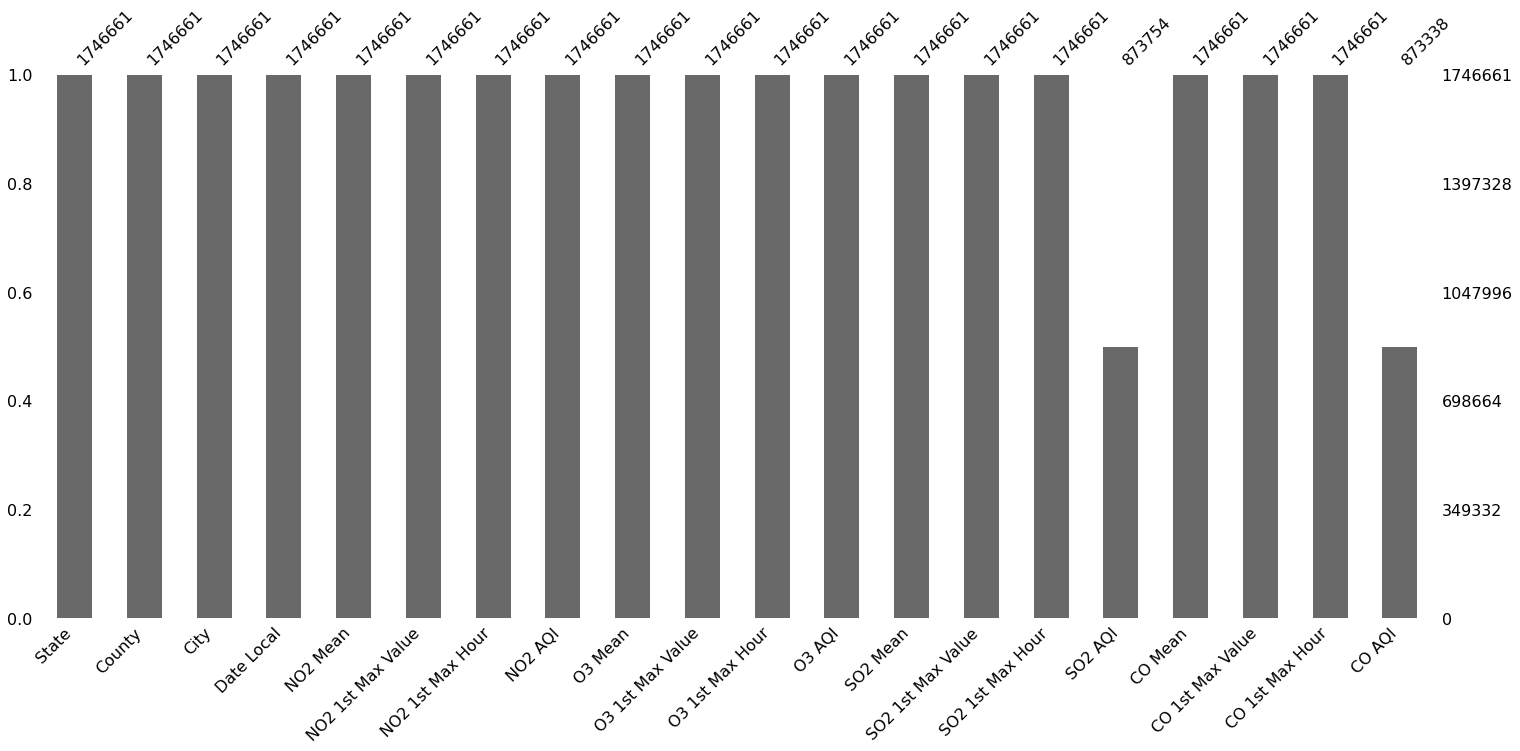

In [19]:
msno.bar(us_pollution);

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that SO2 AQI and CO AQI columns have over 50% of the values missing. It is not known why this number of values are missing and so it would not be okay to drop these rows. Let's now see how we can impute these missing values.

In [20]:
# Make a copy of the dataframe

us_pollution1 = us_pollution.copy()

#### Imputing using interpolation method

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

Refer to the official documentation for a complete list of interpolation strategies, [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html).

In [21]:
# Imputing using interpolation method

us_pollution1.interpolate(limit_direction="both",inplace=True)

In [22]:
us_pollution1.isna().sum()

State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

All the missing values have been filled. There is no more missing data

Let's parse dates, this will add in our analysis. This can be done by using the `pd.to_datetime` function

In [23]:
us_pollution1['Date Local'] = pd.to_datetime(us_pollution1['Date Local'])


In [24]:
us_pollution1['Year'] = us_pollution1['Date Local'].dt.year
us_pollution1['Month'] = us_pollution1['Date Local'].dt.month
us_pollution1['Day'] = us_pollution1['Date Local'].dt.day
us_pollution1['DayofWeek'] = us_pollution1['Date Local'].dt.dayofweek

## Exploratory Analysis and Visualization

Now that we have a clean data we can explore it visually, establish some relationships and answer some questions. 

First, we will install and import some python libraries that will aid in this analysis; `plotly`, `seaborn` and `matplotlib`.

In [25]:
!pip install plotly seaborn matplotlib --upgrade --quiet

     |████████████████████████████████| 15.2 MB 5.3 MB/s 
     |████████████████████████████████| 285 kB 56.3 MB/s 
     |████████████████████████████████| 11.2 MB 50.5 MB/s 
     |████████████████████████████████| 960 kB 58.9 MB/s 


In [26]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

To begin, let's look at the distribution of these pollutants

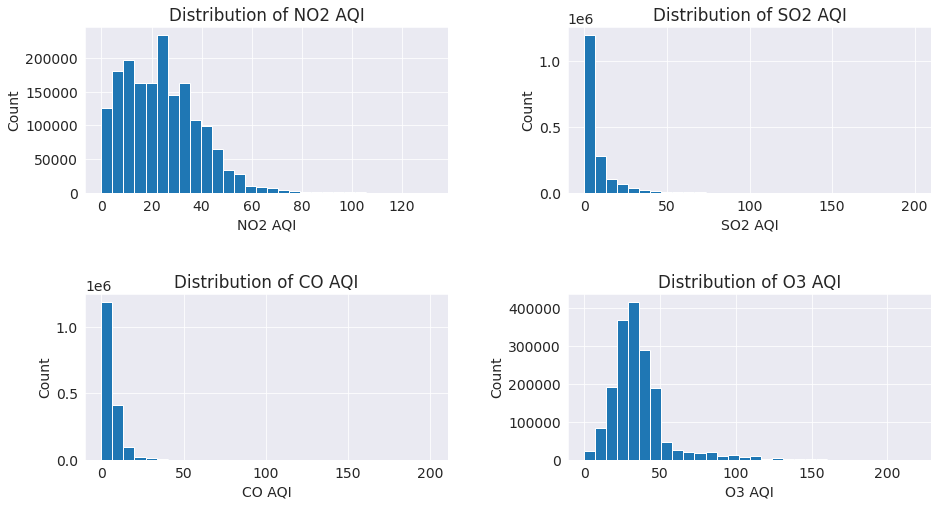

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))


axes[0,0].set_title('Distribution of NO2 AQI')
axes[0,0].hist(x=us_pollution1['NO2 AQI'], bins=30)
axes[0,0].set_xlabel('NO2 AQI')
axes[0,0].set_ylabel('Count');


axes[0,1].set_title('Distribution of SO2 AQI')
axes[0,1].hist(x=us_pollution1['SO2 AQI'],bins=30)
axes[0,1].set_xlabel('SO2 AQI')
axes[0,1].set_ylabel('Count');


axes[1,0].set_title('Distribution of CO AQI')
axes[1,0].hist(x=us_pollution1['CO AQI'],bins=30)
axes[1,0].set_xlabel('CO AQI')
axes[1,0].set_ylabel('Count');


axes[1,1].set_title('Distribution of O3 AQI')
axes[1,1].hist(x=us_pollution1['O3 AQI'],bins=30)
axes[1,1].set_xlabel('O3 AQI')
axes[1,1].set_ylabel('Count');


plt.tight_layout(pad=3);

When you look at the distribution of SO2 and CO AQIs you will notice that they seem to have extreme outliers with bulk of their data centered around the values (0 - 20). This forms an exponential distribution (positive skew).Skewness is simply a reflection of a data set in which activity is heavily condensed in one range and less condensed in another. This means the outliers of the distribution curve are further out towards the right and closer to the mean on the left. The consequence of this on human health is hardly known.

Let's check the city with the highest concentration of CO

In [28]:
us_city = us_pollution1[['NO2 AQI','SO2 AQI','CO AQI','O3 AQI']].groupby([us_pollution1['State'], us_pollution1['City'],us_pollution1['County']]).sum()

In [29]:
us_city = us_city.reset_index()
us_city_highco = us_city.sort_values('CO AQI', ascending=False).head(10)

In [30]:
fig = px.histogram(us_city_highco, x='City', y='CO AQI', title='City with Highest Concentration of CO')
fig.show()

Phoenix, which is a city in Arizona, appears to have the highest concentration of CO. 

## Answering Questions about the Data

### Q1: Which two states have the highest concentration of all four pollutants?

In [31]:
# NO2
us_pollution1_no2 = us_pollution1.groupby('State')['NO2 AQI'].sum().sort_values(ascending=False).head(2)

# SO2
us_pollution1_so2 = us_pollution1.groupby('State')['SO2 AQI'].sum().sort_values(ascending=False).head(2)

# CO
us_pollution1_co = us_pollution1.groupby('State')['CO AQI'].sum().sort_values(ascending=False).head(2)

# O3
us_pollution1_o3 = us_pollution1.groupby('State')['O3 AQI'].sum().sort_values(ascending=False).head(2)

Let's visualise this using matplotlib subplots.

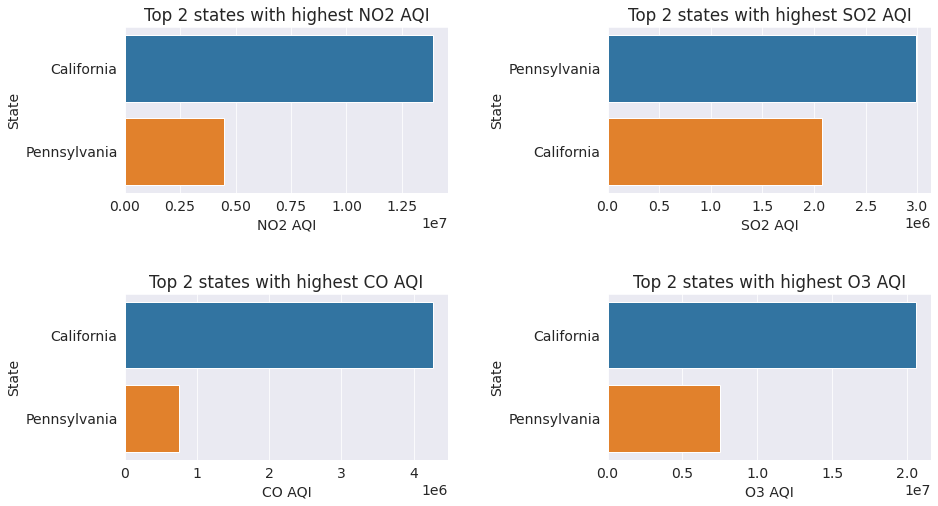

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Pass the axes into seaborn

axes[0,0].set_title('Top 2 states with highest NO2 AQI')
sns.barplot(x=us_pollution1_no2, 
            y=us_pollution1_no2.index, ax=axes[0,0]);

axes[0,1].set_title('Top 2 states with highest SO2 AQI')
sns.barplot(x=us_pollution1_so2, 
                y=us_pollution1_so2.index, 
                ax=axes[0,1]);

axes[1,0].set_title('Top 2 states with highest CO AQI')
sns.barplot(x=us_pollution1_co, 
                y=us_pollution1_co.index, 
                ax=axes[1,0]);

axes[1,1].set_title('Top 2 states with highest O3 AQI')
sns.barplot(x=us_pollution1_o3, 
                y=us_pollution1_o3.index, 
                ax=axes[1,1])


plt.tight_layout(pad=3);

We can see from the above that for all four pollutants, `California` and `Pennsylvania`are in the top two. It is no surprise that California is top on this list as it is the most populated state in the U.S while Pennsylvania ranks at number 5.


We will now be exploring these two states further to gain more insights.

### Q2: What is the distribution of all four pollutants in California and Pennsylvania?

In [33]:
us_pollution_state = us_pollution1.groupby('State')[['SO2 AQI', 'NO2 AQI', 'CO AQI', 'O3 AQI']].mean()

Let's create a dataframe for the two states.

In [34]:
us_pollution_top = us_pollution_state.loc[['California','Pennsylvania']]
us_pollution_top

,SO2 AQI,NO2 AQI,CO AQI,O3 AQI
State,,,,
California,3.599617,24.110238,7.404699,35.722673
Pennsylvania,15.807702,23.814084,3.986738,39.712682


Let's visualize this using matplotlib subplots.

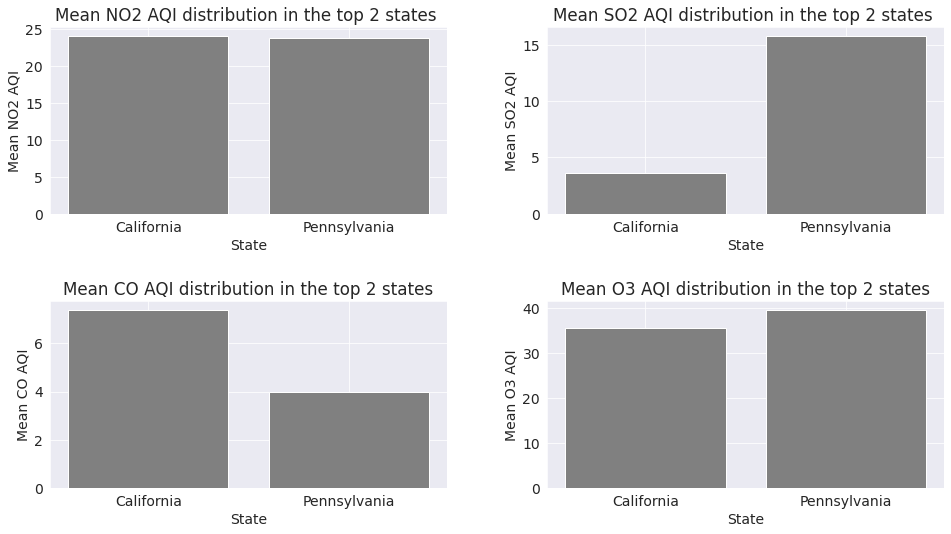

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))


axes[0,0].set_title('Mean NO2 AQI distribution in the top 2 states ')
axes[0,0].bar(x=us_pollution_top.index, 
              height=us_pollution_top['NO2 AQI'],
              color='Gray')
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Mean NO2 AQI');


axes[0,1].set_title('Mean SO2 AQI distribution in the top 2 states ')
axes[0,1].bar(x=us_pollution_top.index, 
              height=us_pollution_top['SO2 AQI'],
              color='Gray')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Mean SO2 AQI');


axes[1,0].set_title('Mean CO AQI distribution in the top 2 states')
axes[1,0].bar(x=us_pollution_top.index, 
              height=us_pollution_top['CO AQI'],
             color='Grey')
axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('Mean CO AQI');


axes[1,1].set_title('Mean O3 AQI distribution in the top 2 states')
axes[1,1].bar(x=us_pollution_top.index, 
              height=us_pollution_top['O3 AQI'],
              color='Grey')
axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('Mean O3 AQI');


plt.tight_layout(pad=2);



The states show a relatively low mean AQI, with values less than 50. Thus, signifying that there's little or no risk of air pollution in these regions. However, daily values have to be studied to understand the concentration levels of these pollutants and their health impacts.

#### Relationships and Trends

In order to better understand the variables we will try to establish;
* Relationship between pairs
* Yearly trends
* Monthly trends
* Weekly trends

**Relationship between pairs**

### Q3: Is there any relationship between pollutants? If there is, how has it changed overtime in California and Pennsylvania?

Using a correlation matrix we will check if there is any relationship between pairs of variable

Let's create a dataframe with the four pollutants we are analysing.

In [36]:
us_pollution1_pol = us_pollution1[['NO2 AQI','SO2 AQI','CO AQI','O3 AQI']]

Using the pandas `corr()`method, we can compute the correlation matrix

In [37]:
correlation_mat = us_pollution1_pol.corr()

We will now visualize this relationship by using the seaborn’s `heatmap()` method to plot the matrix. The parameter `‘annot=True‘` displays the values of the correlation coefficient in each cell.

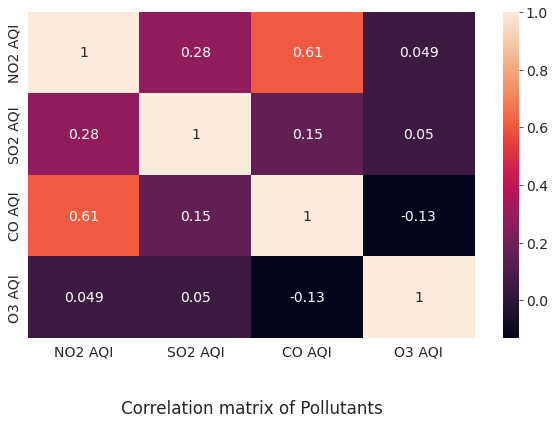

In [38]:
plt.figure(figsize=(10,6))
plt.title("Correlation matrix of Pollutants", y=-0.25)
sns.heatmap(correlation_mat, annot = True);

We can now see that CO and NO2 is a strong correlation pair (with a correlation coefficient greater than 0.6). This means when the value of CO increases, the value of NO2 increases in a similar fashion. This could be because they have the same sources of pollution which is primarily from burning of fuel.

Let's visualize this using our top 2 states

In [39]:
us_pol = us_pollution1.query("State in ('California','Pennsylvania')")

In [40]:
px.scatter(us_pol, x=us_pol['NO2 AQI'], y=us_pol['CO AQI'], 
           color='State', animation_frame="Year",
          title='Growth pattern of CO and NO2 Overtime in California and Pennsylvania')

Output hidden; open in https://colab.research.google.com to view.

We can see from this plot that california has a number of outliers, This could be why there is a disproportionate amount of these pollutants in California than in most other states.  Outliers could reflect measurement errors or unusual high air pollution events. Additional evaluation using expert knowledge is needed to decide on treatment of the identified outliers.

**Yearly trends**

### Q4: What is the yearly trend between pollutants? Has their been an upward or downward trend in the rate of pollution?

Let's check whether there has been an improvement in air quality in the United states over the years.

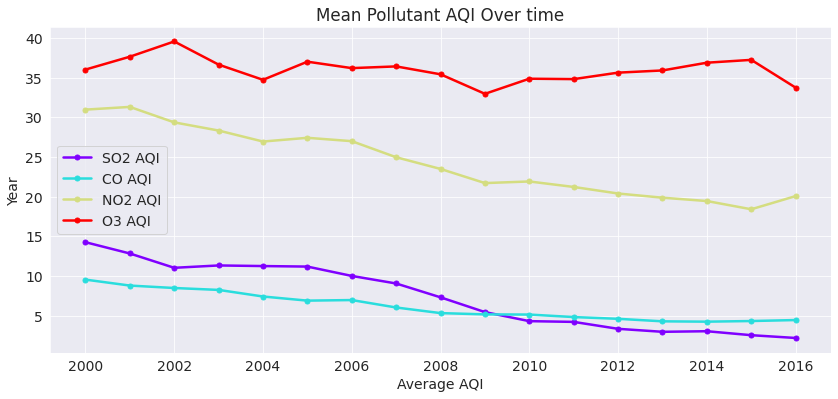

In [41]:
# Plot the aggregate of all four pollutants

f, ax = plt.subplots(figsize=[14, 6])
us_pollution1.groupby(['Year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'})\
.plot(colormap='rainbow',marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over time')
ax.set_xlabel('Average AQI')
ax.set_ylabel('Year')

plt.show()

The trend of all pollutants, except for Ozone, which keeps fluctuating, is downward, signifying that the air quality in the United States has gotten better over the years.

Let's explore ozone trends in relation to the two most polluted states

**Monthly trends**

Let's take a closer look at the year 2016 as it is the latest year in our dataset.

### Q5: What is the monthly trend of ozone(O3) in the year 2016 in California?

In [42]:
us_ozone_cali = us_pollution1[['State','O3 AQI','Month','Year']]

In [43]:
us_ozone_cali16 = us_ozone_cali.query('Year == 2016 and State =="California"')

In [44]:
#Using Plotly as a plotting backend for Pandas

pd.options.plotting.backend = "plotly"

In [45]:
us_ozone_cali16.plot( x='Month', 
                     y='O3 AQI', 
                     kind='box', 
                     title='Concentrations of Ozone by month in California in the year 2016')

In California, the air quality index for ozone(O3) seems to be on the increase from January through to April. 

**Note:** The trend for the rest of the year is not known and this could be due to the time this dataset was created.

### Q6: What is the monthly trend of ozone(O3) in the year 2016 in Pennsylvania?

In [46]:
us_ozone_penn = us_pollution1[['State','O3 AQI','Month','Year']]

In [47]:
us_ozone_penn16 = us_ozone_penn.query('Year == 2016 and State =="Pennsylvania"')

In [48]:
us_ozone_penn16.plot( x='Month', 
                     y='O3 AQI', 
                     kind='box', 
                     title='Concentrations of Ozone by month in Pennsylvania in the year 2016')

A similar upward trend is noticed in Pennsylvania from the month January to March. This increase in the concentrations of ozone could be because variations in weather play an important role in determing ozone concentrations. Ozone is more readily formed on warm, sunny days when the air is stagnant than on cloudy, cool, rainy or windy day.

**Note:** The trend for the rest of the year is not known and this could be due to the time this dataset was created.

**Weekly trends**

In both California and Pennsylvania, ozone(O3) is the only pollutant to reach abnormal levels with aqi of over 200. One of the reasons for this could be attributed to the fact that both states have high population and so high emissions of pollutants by cars, power plants, industrial boilers, refineries, chemical plants, and other sources is expected. As we know, ozone is not emitted directly into the air, but is created by chemical reactions in the presence of sunlight between oxides of nitrogen (NOx) and volatile organic compounds (VOC) emitted from these sources.

Let's use the day of week to see the weekly trend of O3 AQI level.

### Q7: On what day(s) of the week  did Ozone(O3) AQI reach very unhealthy levels (having an AQI value 201 through 300) in California?

In [49]:
unhealthy_o3 = us_pollution1.query("`O3 AQI` >= 201 and State == 'California'")

In [50]:
px.bar(unhealthy_o3, x=unhealthy_o3['DayofWeek'], 
           y=unhealthy_o3['O3 AQI'], 
           hover_data=['Day','Month','Year'],
           labels={"DayofWeek":"Day of Week",
                   "O3 AQI":"O3 AQI Levels",
                    "Month":"Month of the Year"
                     
               
           },
           color='DayofWeek',
           title='Day of the Week with very Unhealthy levels of O3 in California')

In California, unhealthy levels of ozone are mostly recorded on Saturdays. There's no recording of ozone AQI levels exceeding 200 on Tuesdays. 

**Note:** The weather condition and time of day may be a contributory factor to ozone levels recorded.

### Q8: On what day(s) of the week did Ozone(O3) AQI reach very unhealthy levels (having an AQI value 201 through 300) in Pennsylvania?

In [51]:
unhealthy_o3_pen = us_pollution1.query("`O3 AQI` >= 201 and State == 'Pennsylvania'")

In [52]:
px.bar(unhealthy_o3_pen, x=unhealthy_o3_pen['DayofWeek'], 
           y=unhealthy_o3_pen['O3 AQI'], 
           hover_data=['Day','Month','Year'],
           labels={"Day":"Day of Month",
                   "O3 AQI":"O3 AQI Levels",
                    "Month":"Month of the Year"
                     
               
           },
           color='DayofWeek',
           title='Day of the Week with very Unhealthy levels of Ozone(O3) in Pennsylvania')


In Pennsylvania, unhealthy levels of ozone are mostly recorded on Tuesdays. There's no recording of ozone AQI levels exceeding 200 on Wednesdays.

**Note:** The weather condition and time of day may be a contributory factor to ozone levels recorded.

## Summary

At the end of this project, we were able to make some of these inferences;

* The dataset used for this project has a total of 28 fields. The four pollutants ( NO2 , SO2 , CO, and O3 ) each have 5 specific columns. Observations totaled to over 1.7 million.
* The dataset has data for only 47 states, out of the 51 states in the U.S
* In the original dataset, over 50% of values for SO2 AQI and CO AQI are missing, and the reason for this is not known. However  for the sake of this analysis, we have employed an imputation method (linear interpolation) to impute these missing values.
* SO2 and CO have an exponential distribution. They seem to have more extreme outliers. The consequence of this on human health is hardly known
* Phoenix, which is a city in Arizona, appears to have the second highest concentration of CO. The city with the highest value is not known.
* California and Pennsylvania are the  states with the highest concentration of pollutants, and this is no surprise as California is the most populated state in the U.S, while Pennsylvania comes in at number 5.
* The states (California and Pennsylvania) show a relatively low mean AQI, with values less than 50, which generally means air quality is satisfacatory and air pollution poses little or no risk. However, daily concentration levels need to be observed to understand the degree of pollution.
* CO and NO2 have a strong positive correlation (with a correlation coefficient greater than 0.6). This means that an increase in the value of one results to a similar increase in the value of the other.
* The trend of all pollutants, except for Ozone, which keeps fluctuating, is downward, signifying that the air quality in the United States has gotten better over the years.
* In both California and Pennsylvania, ozone(O3) is the only pollutant to reach abnormal levels with aqi of over 200.
* In both California and Pennsylvania, the air quality index for ozone(O3) seems to be on the increase as we move from colder to warmer months. 
* In California, unhealthy levels of ozone are mostly recorded on Saturdays. There's no recording of ozone AQI levels exceeding 200 on Tuesdays. 
* In Pennsylvania, unhealthy levels of ozone are mostly recorded on Tuesdays. There's no recording of ozone AQI levels exceeding 200 on Wednesdays.



## Future Work

Here are some ideas for future work. Most of these will require data to be merged from other sources.

1. Analyse data from later years (2017 to present) to check if similar trends occur
2. Evaluating aqi and medical history of people in states that have high concentration of these pollutants, to get a general overview of how these pollutants have affected the lives of the people living in those regions
3. Study and analyse air pollution in relation to wind speed and direction. Some pollutants can be transported far distances by wind. For example, Ozone is one of such pollutants, so even rural areas can experience high ozone levels. 
4. Study and analyse air pollution in relation to time of day and temperature.

## References

* https://www.kaggle.com/datasets/sogun3/uspollution
* https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
* https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python
* https://likegeeks.com/python-correlation-matrix/
* https://mdpi-res.com/d_attachment/atmosphere/atmosphere-12-01283/article_deploy/atmosphere-12-01283.pdf
* https://www.airnow.gov/aqi/aqi-basics/
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
* https://www.kaggle.com/code/nicapotato/searching-for-answers-california-pollution#2.-Timeseries-Analysis-on-California-Data:
* https://towardsdatascience.com/10-pandas-query-examples-that-will-make-you-use-pandas-query-easily-12a45b1e115
* https://www.epa.gov/air-trends/trends-ozone-adjusted-weather-conditions

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 